# Assignment: Implementing Gradient Descent and Stochastic Gradient Descent

## Understanding Different Types of Gradient Descent
### Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent updates the model parameters using only one randomly chosen data point per iteration. 

This makes it computationally efficient and allows it to escape local minima, but it can be noisy and less stable compared to other methods. 

The randomness in the updates introduces variance, which can sometimes help in finding a better solution, but may also slow down convergence or cause oscillations.

Mathematically, the update rule for SGD is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J_i(\theta) $$
where:
- $\theta$ represents the parameters
- $\alpha$ is the learning rate
- $\nabla J_i(\theta)$ is the gradient computed using a single data point $$ i $$


### Mini-Batch Gradient Descent
Mini-Batch Gradient Descent is a compromise between batch and stochastic gradient descent. Instead of using the entire dataset or a single data point, it updates the parameters using a small batch of randomly selected data points. This balances stability and efficiency, making it a commonly used approach in deep learning. Mini-batch gradient descent helps smooth out some of the noise of SGD while still being computationally efficient. The batch size is a hyperparameter that affects convergence speed and accuracy.

The update rule for mini-batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} \nabla J_i(\theta) $$
where:
- $m$ is the mini-batch size
- $\sum_{i=1}^{m} \nabla J_i(\theta)$ represents the gradient computed over a batch of $m$ data points

### Batch Gradient Descent (Vanilla)
Batch Gradient Descent computes the gradient using the entire dataset at each iteration. 

While this method leads to a smooth convergence, it is computationally expensive, especially for large datasets. 

It tends to be more stable and can find the optimal solution efficiently, but it may take longer compared to SGD and Mini-Batch Gradient Descent.

The update rule for batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J(\theta) $$
where:
- $\nabla J(\theta)$ is the gradient computed over the entire dataset


## Task 1: Implement Gradient Descent for a Quadratic Function
1. Define a quadratic function, e.g., $$ f(x) = x^2 $$.
2. Implement a gradient descent to minimize this function.
3. Use different learning rates and visualize the convergence.
4. Plot the function and the gradient descent path.
5. Plot the evolution of loss across iterations

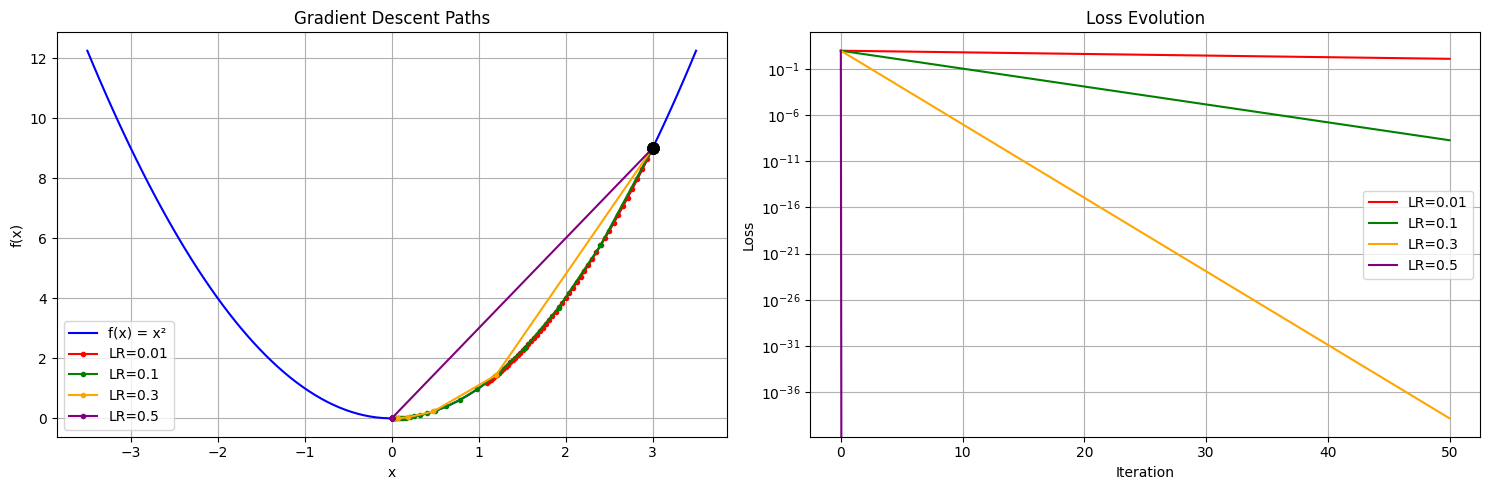

Analysis of different learning rates:
LR=0.01: Final loss = 1.193576, Converged in 51 iterations
LR=0.1: Final loss = 0.000000, Converged in 36 iterations
LR=0.3: Final loss = 0.000000, Converged in 9 iterations
LR=0.5: Final loss = 0.000000, Converged in 1 iterations


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def grad_f(x):
    return 2*x

def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x
    history = [x]
    losses = [f(x)]
    
    for i in range(num_iterations):
        gradient = grad_f(x)
        x = x - learning_rate * gradient
        history.append(x)
        losses.append(f(x))
    
    return history, losses

initial_x = 3.0
num_iterations = 50
learning_rates = [0.01, 0.1, 0.3, 0.5]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
x_vals = np.linspace(-3.5, 3.5, 100)
plt.plot(x_vals, f(x_vals), 'b-', label='f(x) = x²')

colors = ['r', 'g', 'orange', 'purple']
for i, lr in enumerate(learning_rates):
    history, losses = gradient_descent(initial_x, lr, num_iterations)
    plt.plot(history, f(np.array(history)), 'o-', color=colors[i], 
             label=f'LR={lr}', markersize=3)
    plt.plot(history[0], f(history[0]), 'ko', markersize=8) 

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Paths')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for i, lr in enumerate(learning_rates):
    history, losses = gradient_descent(initial_x, lr, num_iterations)
    plt.plot(losses, color=colors[i], label=f'LR={lr}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Evolution')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()

print("Analysis of different learning rates:")
for lr in learning_rates:
    history, losses = gradient_descent(initial_x, lr, num_iterations)
    final_loss = losses[-1]
    print(f"LR={lr}: Final loss = {final_loss:.6f}, Converged in {len([l for l in losses if l > 1e-6])} iterations")

## Task 2: Gradient Descent in Higher Dimensions
1. Define a function like $$ f(x, y) = x^2 + y^2 $$.
2. Implement gradient descent for two variables.
3. Visualize the contour plot and the optimization path.
4. Experiment with different initialization points and learning rates.

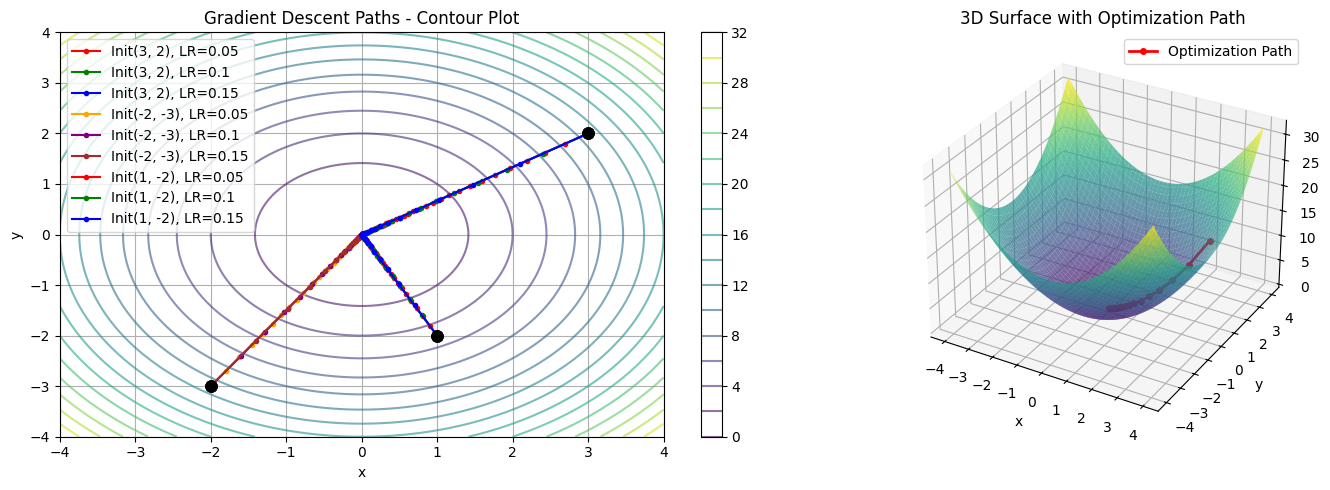

In [10]:
from mpl_toolkits.mplot3d import Axes3D

def f_2d(x, y):
    return x**2 + y**2

def grad_f_2d(x, y):
    return 2*x, 2*y

def gradient_descent_2d(initial_point, learning_rate, num_iterations):
    x, y = initial_point
    history = [(x, y)]
    losses = [f_2d(x, y)]
    
    for i in range(num_iterations):
        grad_x, grad_y = grad_f_2d(x, y)
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        history.append((x, y))
        losses.append(f_2d(x, y))
    
    return history, losses

initial_points = [(3, 2), (-2, -3), (1, -2)]
learning_rates = [0.05, 0.1, 0.15]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f_2d(X, Y)

plt.contour(X, Y, Z, levels=20, alpha=0.6)
plt.colorbar()

colors = ['r', 'g', 'b', 'orange', 'purple', 'brown']
color_idx = 0

for init_point in initial_points:
    for lr in learning_rates:
        history, losses = gradient_descent_2d(init_point, lr, 30)
        history = np.array(history)
        plt.plot(history[:, 0], history[:, 1], 'o-', 
                color=colors[color_idx], markersize=3,
                label=f'Init{init_point}, LR={lr}')
        plt.plot(history[0, 0], history[0, 1], 'ko', markersize=8)
        color_idx = (color_idx + 1) % len(colors)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Paths - Contour Plot')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2, projection='3d')
surf = plt.gca().plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

history, losses = gradient_descent_2d((3, 2), 0.1, 20)
history = np.array(history)
plt.plot(history[:, 0], history[:, 1], f_2d(history[:, 0], history[:, 1]), 
         'ro-', markersize=4, linewidth=2, label='Optimization Path')

plt.xlabel('x')
plt.ylabel('y')
plt.title('3D Surface with Optimization Path')
plt.legend()

plt.tight_layout()
plt.show()

## Task 3: Implement Stochastic Gradient Descent (SGD)
1. Generate a synthetic dataset : $$ y = 3x + 5 + \text{noise} $$.
2. Run gradient descent for linear regression.
3. Run stochastic gradient descent and compare results.
4. Plot the regression line and analyze the difference in convergence speed.

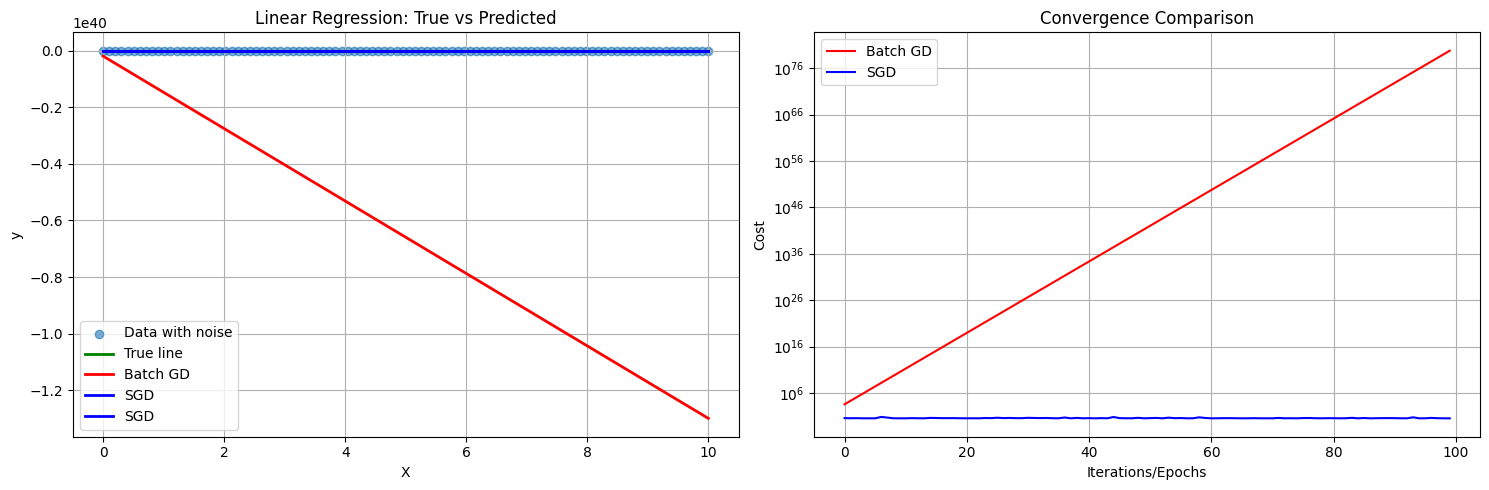

Batch Gradient Descent Results:
Estimated coefficients: intercept=-192491609983611225825623489796091412480.000, slope=-1280203350573559342164220821697718124544.000
Final cost: 57407936916580384939980154671683956515899772044346474795140785255319909735333888.0000

Stochastic Gradient Descent Results:
Estimated coefficients: intercept=3.668, slope=3.208
Final cost: 3.5567

True coefficients: intercept=5.0, slope=3.0


In [11]:
np.random.seed(42)
n_samples = 100
X = np.linspace(0, 10, n_samples)
true_slope = 3
true_intercept = 5
y = true_slope * X + true_intercept + np.random.normal(0, 2, n_samples)

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    return np.mean(errors**2)

def compute_gradient(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    return X.T.dot(errors) / len(X)

def compute_stochastic_gradient(x_i, y_i, theta):
    prediction = x_i.dot(theta)
    error = prediction - y_i
    return x_i * error

X_b = np.c_[np.ones((n_samples, 1)), X]  

def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=100):
    theta = np.random.randn(2, 1)  
    cost_history = []
    
    for iteration in range(n_iterations):
        gradients = compute_gradient(X, y, theta)
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=10):
    theta = np.random.randn(2, 1)
    cost_history = []
    m = len(X)
    
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            x_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            gradient = compute_stochastic_gradient(x_i, y_i, theta)
            theta = theta - learning_rate * gradient
        
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

theta_batch, cost_batch = batch_gradient_descent(X_b, y.reshape(-1, 1), 
                                                learning_rate=0.1, n_iterations=100)
theta_sgd, cost_sgd = stochastic_gradient_descent(X_b, y.reshape(-1, 1), 
                                                 learning_rate=0.01, n_epochs=100)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.6, label='Data with noise')
plt.plot(X, true_slope * X + true_intercept, 'g-', linewidth=2, label='True line')

y_pred_batch = X_b.dot(theta_batch)
plt.plot(X, y_pred_batch, 'r-', linewidth=2, label='Batch GD')

y_pred_sgd = X_b.dot(theta_sgd)
plt.plot(X, y_pred_sgd, 'b-', linewidth=2, label='SGD')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: True vs Predicted')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(cost_batch, 'r-', label='Batch GD')
plt.plot(np.linspace(0, len(cost_batch)-1, len(cost_sgd)), cost_sgd, 'b-', label='SGD')
plt.xlabel('Iterations/Epochs')
plt.ylabel('Cost')
plt.title('Convergence Comparison')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()

print("Batch Gradient Descent Results:")
print(f"Estimated coefficients: intercept={theta_batch[0][0]:.3f}, slope={theta_batch[1][0]:.3f}")
print(f"Final cost: {cost_batch[-1]:.4f}")

print("\nStochastic Gradient Descent Results:")
print(f"Estimated coefficients: intercept={theta_sgd[0][0]:.3f}, slope={theta_sgd[1][0]:.3f}")
print(f"Final cost: {cost_sgd[-1]:.4f}")

print(f"\nTrue coefficients: intercept=5.0, slope=3.0")

### Task 4
1. Define the multimodal function $$f(x, y) = (x^2 + y^2) * sin(x) * sin(y) + x^2 + y^2$$.
2. Visualize the 3D surface plot as well as the contour plot.
3. What could be a problem for convergence of the algorithm here ?
5. Run the gradient descent algorithm with different initial values and learning rates.
7. Add the optimization path to the contour plot for each initial value.
8. Compare the performance path of gradient descent and stochastic gradient descent for each initial value.



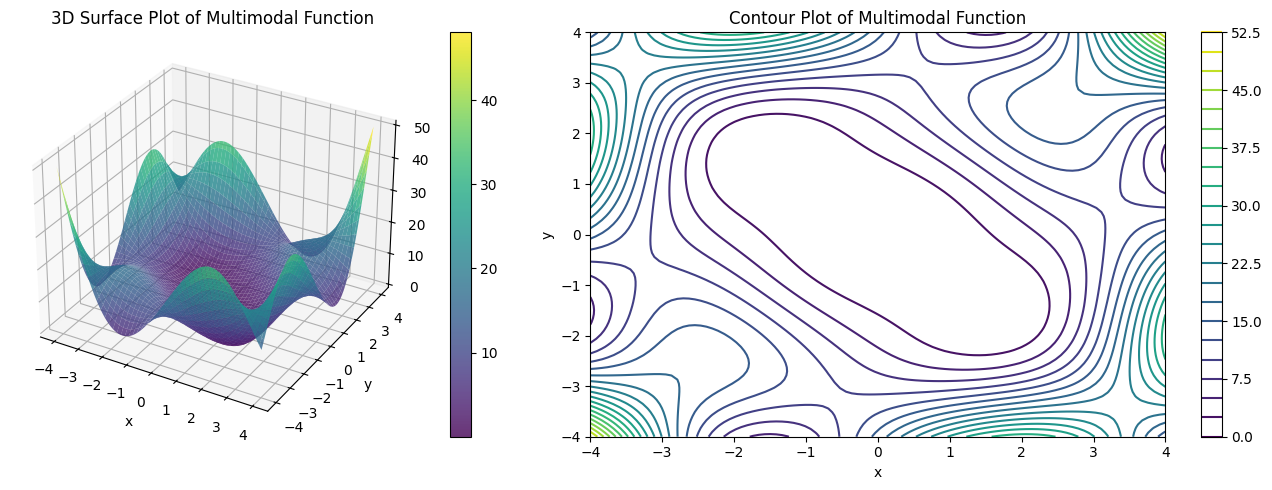

C:\Users\Admin\AppData\Local\Temp\ipykernel_11428\2188638927.py:73: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(history_sgd[:, 0], history_sgd[:, 1], 's-', color=colors[i],


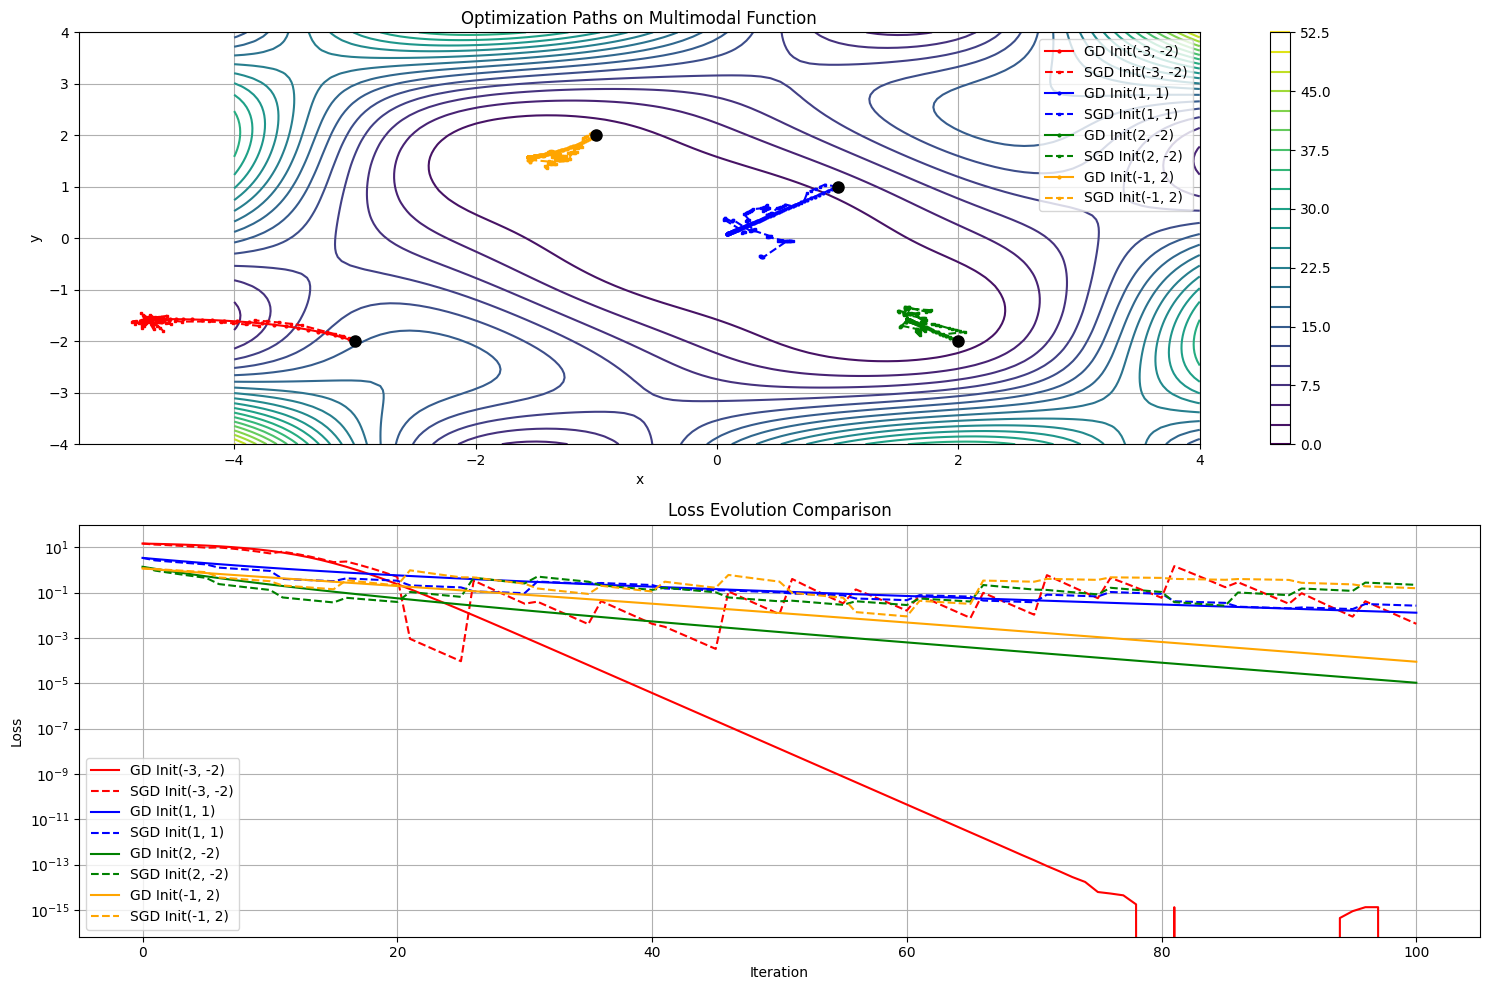

Analysis of multimodal function optimization:
Problems for convergence:
1 Multiple local minima so algorithm can get stuck in suboptimal solutions
2 Complex landscape with saddle points
3 Sensitivity to initial conditions
4 Oscillations around minima due to complex gradient field


In [14]:
def multimodal_function(x, y):
    return (x**2 + y**2) * np.sin(x) * np.sin(y) + x**2 + y**2

def multimodal_gradient(x, y):
    df_dx = 2*x * np.sin(x) * np.sin(y) + (x**2 + y**2) * np.cos(x) * np.sin(y) + 2*x
    df_dy = 2*y * np.sin(x) * np.sin(y) + (x**2 + y**2) * np.sin(x) * np.cos(y) + 2*y
    return df_dx, df_dy

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = multimodal_function(X, Y)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1, projection='3d')
surf = plt.gca().plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
plt.colorbar(surf)
plt.title('3D Surface Plot of Multimodal Function')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
contour = plt.contour(X, Y, Z, levels=20)
plt.colorbar(contour)
plt.title('Contour Plot of Multimodal Function')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

def gradient_descent_multimodal(initial_point, learning_rate, num_iterations, stochastic=False):
    x, y = initial_point
    history = [(x, y)]
    losses = [multimodal_function(x, y)]
    
    for i in range(num_iterations):
        if stochastic and i % 5 == 0: 
            noise_x, noise_y = np.random.normal(0, 0.1, 2)
        else:
            noise_x, noise_y = 0, 0
            
        grad_x, grad_y = multimodal_gradient(x, y)
        x = x - learning_rate * grad_x + noise_x
        y = y - learning_rate * grad_y + noise_y
        history.append((x, y))
        losses.append(multimodal_function(x, y))
    
    return history, losses

initial_points = [(-3, -2), (1, 1), (2, -2), (-1, 2)]
learning_rate = 0.01
num_iterations = 100

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
contour = plt.contour(X, Y, Z, levels=20)
plt.colorbar(contour)

colors = ['red', 'blue', 'green', 'orange']
for i, init_point in enumerate(initial_points):
    history_gd, losses_gd = gradient_descent_multimodal(init_point, learning_rate, 
                                                       num_iterations, stochastic=False)
    history_gd = np.array(history_gd)
    plt.plot(history_gd[:, 0], history_gd[:, 1], 'o-', color=colors[i], 
             markersize=2, label=f'GD Init{init_point}')
    
    history_sgd, losses_sgd = gradient_descent_multimodal(init_point, learning_rate, 
                                                         num_iterations, stochastic=True)
    history_sgd = np.array(history_sgd)
    plt.plot(history_sgd[:, 0], history_sgd[:, 1], 's-', color=colors[i], 
             markersize=2, linestyle='--', label=f'SGD Init{init_point}')
    
    plt.plot(init_point[0], init_point[1], 'ko', markersize=8)

plt.title('Optimization Paths on Multimodal Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
for i, init_point in enumerate(initial_points):
    history_gd, losses_gd = gradient_descent_multimodal(init_point, learning_rate, 
                                                       num_iterations, stochastic=False)
    history_sgd, losses_sgd = gradient_descent_multimodal(init_point, learning_rate, 
                                                         num_iterations, stochastic=True)
    
    plt.plot(losses_gd, color=colors[i], linestyle='-', label=f'GD Init{init_point}')
    plt.plot(losses_sgd, color=colors[i], linestyle='--', label=f'SGD Init{init_point}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Evolution Comparison')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()

print("Analysis of multimodal function optimization:")
print("Problems for convergence:")
print("1 Multiple local minima so algorithm can get stuck in suboptimal solutions")
print("2 Complex landscape with saddle points")
print("3 Sensitivity to initial conditions")
print("4 Oscillations around minima due to complex gradient field")

## SKlearn regressions library

- Take one dataset we already used for previous weeks. 
- Prepare data to train a model
- Fit a linear regression with OLS method
- Fit a linear regression with gradient descent (look at sklearn documentation to do so)
- Compare and explain the results

REGRESSION MODEL COMPARISON

Dataset: california housing
Training samples: 16512
Test samples: 4128
Features: 8

OLS linear regression results:
MSE: 0.5559
R² score: 0.5758
coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
intercept: 2.0719

SGD regression results:
MSE: 0.5506
R² score: 0.5798
Coefficients: [ 0.81259204  0.1147773  -0.250275    0.30239761  0.00232812 -0.13650495
 -0.90931554 -0.89061164]
Intercept: 2.0573

Comparison:
MSE difference: 0.0053
R² difference: 0.0040


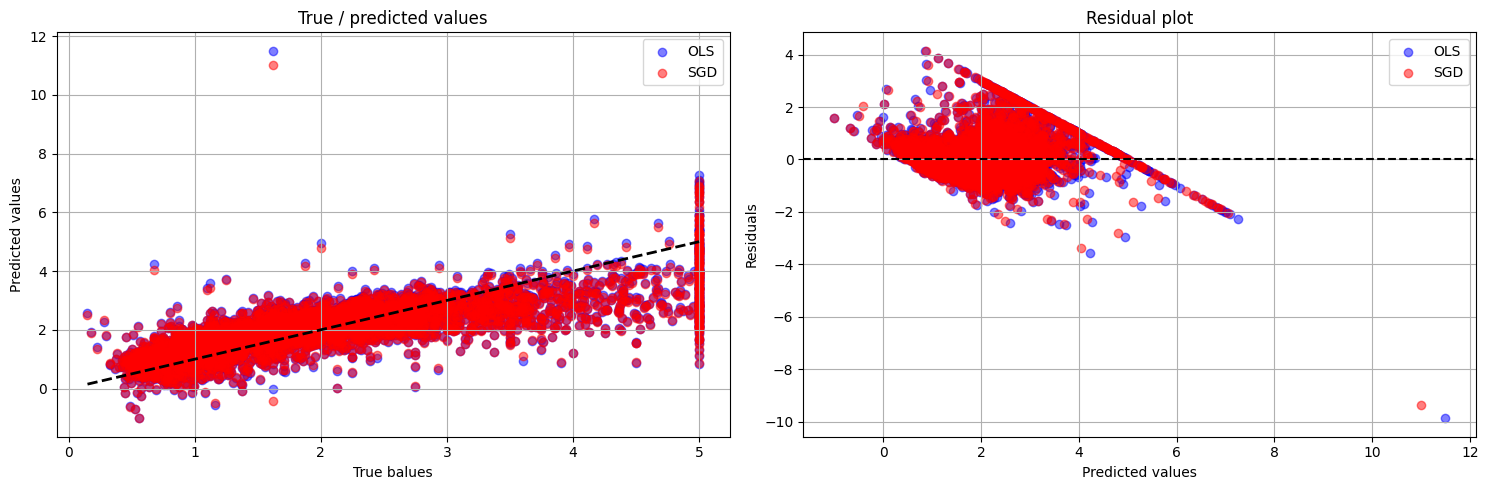


Explanation of Results:
1 OLS (Ordinary Least Squares):
   - Finds the exact mathematical solution
   - Computationally expensive for large datasets
   - Guaranteed optimal solution for linear problems

2 SGD (Stochastic Gradient Descent):
   - Approximate solution through iterative updates
   - More efficient for large datasets
   - Can escape local minima due to randomness
   - Requires careful tuning of learning rate

In this case, both methods perform similarly, which is expected for
well-behaved linear regression problems


In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ols = LinearRegression()
ols.fit(X_train_scaled, y_train)
y_pred_ols = ols.predict(X_test_scaled)

sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

r2_ols = r2_score(y_test, y_pred_ols)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("=" * 60)
print("REGRESSION MODEL COMPARISON")
print("=" * 60)
print(f"\nDataset: california housing")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")

print(f"\nOLS linear regression results:")
print(f"MSE: {mse_ols:.4f}")
print(f"R² score: {r2_ols:.4f}")
print(f"coefficients: {ols.coef_}")
print(f"intercept: {ols.intercept_:.4f}")

print(f"\nSGD regression results:")
print(f"MSE: {mse_sgd:.4f}")
print(f"R² score: {r2_sgd:.4f}")
print(f"Coefficients: {sgd.coef_}")
print(f"Intercept: {sgd.intercept_[0]:.4f}")

print(f"\nComparison:")
print(f"MSE difference: {abs(mse_ols - mse_sgd):.4f}")
print(f"R² difference: {abs(r2_ols - r2_sgd):.4f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ols, alpha=0.5, label='OLS', color='blue')
plt.scatter(y_test, y_pred_sgd, alpha=0.5, label='SGD', color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True balues')
plt.ylabel('Predicted values')
plt.title('True / predicted values')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
residuals_ols = y_test - y_pred_ols
residuals_sgd = y_test - y_pred_sgd
plt.scatter(y_pred_ols, residuals_ols, alpha=0.5, label='OLS', color='blue')
plt.scatter(y_pred_sgd, residuals_sgd, alpha=0.5, label='SGD', color='red')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nExplanation of Results:")
print("1 OLS (Ordinary Least Squares):")
print("   - Finds the exact mathematical solution")
print("   - Computationally expensive for large datasets")
print("   - Guaranteed optimal solution for linear problems")

print("\n2 SGD (Stochastic Gradient Descent):")
print("   - Approximate solution through iterative updates")
print("   - More efficient for large datasets")
print("   - Can escape local minima due to randomness")
print("   - Requires careful tuning of learning rate")

print(f"\nIn this case, both methods perform similarly, which is expected for")
print(f"well-behaved linear regression problems")